In [1]:
import staintools
import csv
import os
import glob
import re
from pandas import DataFrame, Series
from PIL import Image
import timeit
import time
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train_paths = ["../data_segments/data_balanced_duplicate_sample/train/Celiac/"]

In [3]:
# get images
images = {}
images_by_folder = {}
for train_path in train_paths:
    images_by_folder[str(train_path)] = []
    files = glob.glob(os.path.join(train_path, '*.jpg'))
    for fl in files:
        flbase = os.path.basename(fl)
        flbase_noext = os.path.splitext(flbase)[0]
        images[flbase_noext]=fl
        images_by_folder[str(train_path)].append(flbase_noext)

In [4]:
# initialize stain and brightness normalizer
stain_normalizer = staintools.StainNormalizer(method='vahadane')
standardizer = staintools.BrightnessStandardizer()

In [5]:
# choose target image
target_image = staintools.read_image("../data_segments/data_balanced_duplicate_sample/valid/Celiac/C06-27_01_1000_2000_0.jpg")
standard_target_image = standardizer.transform(target_image)
stain_normalizer.fit(standard_target_image)

In [6]:
# get destination path
path_change_map = {}

for key in list(images_by_folder.keys()):
    temp = key.replace('..', '/scratch/as3ek')
    path_change_map[key] = temp

1 C11-54_05_6500_4000_1
2 C03-08_02_4329_2997_0
3 C10-52_03_2331_6660_1
4 C17-83_04_4995_5661_1
5 C13-67_02_3663_2664_0
6 C03-10_01_3330_4329_0
7 C03-06_02_5328_2664_1
8 C10-48_04_9500_9500_0
9 C10-52_04_3500_2500_0
10 C15-75_03_4662_9657_0
11 C13-66_03_4995_11655_0
12 C06-33_01_999_999_1
13 C08-41_01_9657_4329_1
14 C12-63_03_2664_5661_1
15 C14-70_01_1665_2997_1
16 C06-31_02_999_4329_1
17 C10-49_01_2664_5328_0
18 C10-47_01_14319_4662_0
19 C15-75_02_11322_1998_1
20 C17-80_02_2997_9657_0
21 C12-64_01a_8325_2664_0
22 C05-26_03_4000_5000_0
23 C10-47_02_9000_4000_0
24 C10-47_01_12500_6000_0
25 C08-43_01_4500_500_0
26 C03-05_05_3330_8658_0
27 C08-43_02_14985_3330_0
28 C12-64_01b_18500_2500_1
29 C05-26_02_3663_1665_0
30 C06-31_02_7000_2000_1
31 C13-68_01_2997_333_1
32 C04-21_02_1332_1998_1
33 C03-05_05_5661_5661_0
34 C17-81_05_4500_3000_0
35 C12-64_01b_9990_1665_1
36 C12-60_04_2664_6993_0
37 C15-75_01_999_6993_1
38 C06-33_01_3663_2997_0
39 C16-77_03_9000_5000_0
40 C04-18_01_3996_1998_1
41 C07

319 C03-10_03_9657_999_0
320 C16-77_03_7500_4000_1
321 C10-47_02_14652_12654_0
322 C13-66_01_666_5328_1
323 C15-75_02_2000_9500_1
324 C04-18_03_1998_6993_1
325 C04-19_01_6500_3000_1
326 C07-40_03_500_3000_1
327 C16-76_01_4662_11655_1
328 C15-75_03_3996_4329_1
329 C12-58_02_3996_7326_1
330 C15-74_01_7992_5328_0
331 C06-30_01_7992_3663_0
332 C12-60_03_5500_5000_1
333 C13-67_02_999_4662_0
334 C10-52_05_3663_3996_0
335 C10-48_02_4662_999_1
336 C04-18_02_3000_1500_1
337 C11-55_02_3330_3996_0
338 C15-74_02_4995_3996_0
339 C16-76_02_1332_999_1
340 C07-37_05_1665_3663_1
341 C16-77_01_1998_1998_0
342 C03-06_02_0_9000_0
343 C14-71_05_11500_1000_0
344 C10-50_02_1500_6000_1
345 C14-70_04_4662_2331_1
346 C10-47_01_16000_4000_0
347 C03-05_05_0_11000_0
348 C06-29_03_5661_999_0
349 C17-81_02_5328_6993_0
350 C17-81_04_14000_0_1
351 C08-41_02_4995_2331_0
352 C14-71_06_4500_1500_0
353 C16-77_05_9000_6000_0
354 C03-09_01_6327_3330_0
355 C16-79_03_2664_1665_1
356 C09-46_01_7326_13320_0
357 C10-47_01_11500_

634 C15-75_04_6000_7500_0
635 C10-47_02_9657_11322_0
636 C10-52_01_6500_6000_0
637 C17-80_01_3500_14000_1
638 C03-09_02_1332_1332_0
639 C04-19_01_6327_4329_0
640 C06-33_04_9500_1500_1
641 C17-81_05_1500_11000_1
642 C15-74_02_4329_0_1
643 C15-73_01_2997_3330_0
644 C13-68_05_2500_1000_1
645 C16-77_04_4995_5994_0
646 C09-46_01_7326_5994_0
647 C15-73_01_1998_6660_1
648 C15-73_01_5994_4662_1
649 C17-81_02_6000_500_1
650 C11-56_02_6327_5661_1
651 C04-15_01_2331_999_1
652 C03-12_02_333_6660_0
653 C10-50_02_2000_13500_0
654 C12-64_01b_2000_2000_1
655 C10-47_01_12321_5328_1
656 C17-80_02_2997_10323_0
657 C10-48_04_6660_7659_1
658 C16-77_03_8000_6500_0
659 C12-60_03_7659_6660_0
660 C09-46_01_9657_14319_0
661 C07-40_03_3330_1665_0
662 C04-15_01_5661_4329_1
663 C07-35_05_7992_999_1
664 C13-67_04_666_3330_1
665 C14-69_00_4329_3330_0
666 C16-79_02_13500_4000_1
667 C10-47_01_3996_5994_1
668 C03-07_02_8000_4500_0
669 C12-64_01b_6660_6660_0
670 C12-64_01b_4995_2997_0
671 C04-15_01_1000_2000_1
672 C17-8

948 C10-47_02_9500_4500_0
949 C10-47_02_9500_10000_1
950 C04-18_03_666_2331_0
951 C13-66_01_4329_999_1
952 C03-06_02_5328_1665_0
953 C16-77_05_1332_6327_1
954 C05-26_02_1998_666_0
955 C07-40_01_7992_3330_1
956 C15-74_02_3500_5000_1
957 C17-83_02_3330_2664_0
958 C14-71_04_2500_3500_0
959 C13-65_02_3996_1665_0
960 C15-74_02_2500_5500_1
961 C15-74_05_999_2331_0
962 C14-71_05_16317_1665_0
963 C12-61_04_2331_3330_0
964 C17-80_01_11655_5994_1
965 C11-56_01_10656_2997_1
966 C10-47_01_14985_5328_1
967 C15-73_02_3330_1998_0
968 C13-67_02_1665_1665_1
969 C03-10_01_4329_3663_0
970 C16-79_03_4662_1665_1
971 C12-64_01b_13320_1332_0
972 C03-05_06_1998_5661_0
973 C10-47_01_3500_8000_1
974 C17-80_02_9657_3996_0
975 C14-71_06_2664_3330_0
976 C10-48_01_7326_4329_1
977 C03-13_01_333_4329_0
978 C17-83_05_6660_1998_1
979 C07-40_01_666_1665_0
980 C16-77_03_999_3996_0
981 C07-37_01_2997_6660_0
982 C11-57_02_5661_4662_1
983 C17-83_05_5328_7992_0
984 C12-58_01_3663_5994_0
985 C03-10_02_2997_3996_0
986 C15-75_0

1254 C16-77_05_10656_8658_0
1255 C17-81_04_6993_5661_1
1256 C04-15_01_11500_6500_1
1257 C11-54_01_2664_5994_0
1258 C17-83_01_5000_1000_1
1259 C10-49_03_7659_6993_1
1260 C10-48_03_7500_5500_1
1261 C04-18_02_18981_8991_1
1262 C17-83_05_2997_6660_0
1263 C05-26_02_5328_5661_1
1264 C15-75_03_5994_5661_0
1265 C04-18_03_5661_6660_0
1266 C03-06_02_5328_4329_1
1267 C10-49_02_6000_7000_1
1268 C12-61_01_6327_333_1
1269 C10-49_02_3663_333_1
1270 C06-33_01_1000_4000_1
1271 C12-60_03_1665_4662_0
1272 C10-52_02_3996_1998_0
1273 C08-43_02_4500_8000_1
1274 C15-74_02_3330_4995_0
1275 C15-74_01_6993_3663_1
1276 C17-81_02_4329_8658_1
1277 C13-68_06_500_5500_1
1278 C03-10_01_8658_2664_1
1279 C13-65_03_2664_3330_0
1280 C16-79_02_7992_10656_1
1281 C10-52_03_3663_4662_1
1282 C16-79_02_2331_3996_0
1283 C04-18_02_22311_12654_1
1284 C12-63_01_2997_12987_1
1285 C04-15_02_7326_3996_1
1286 C06-28_05_4500_4000_0
1287 C17-81_05_7326_2997_0
1288 C17-83_01_3330_4662_1
1289 C17-80_02_3996_9324_0
1290 C10-48_02_4000_4500

1558 C15-73_01_5000_6500_1
1559 C13-66_01_1000_500_0
1560 C03-07_02_2000_2500_1
1561 C17-81_05_6327_1332_0
1562 C04-23_04_5994_2664_1
1563 C13-65_04_5000_3500_0
1564 C10-47_02_18315_6660_0
1565 C08-41_02_5994_2664_1
1566 C07-37_03_6500_4500_1
1567 C10-51_03_7500_6000_0
1568 C08-43_02_10000_8000_0
1569 C04-15_02_1998_999_1
1570 C12-60_03_9500_3000_0
1571 C12-60_03_5328_666_0
1572 C03-12_02_4329_999_0
1573 C13-68_03_3330_5994_1
1574 C15-75_04_2664_2331_1
1575 C17-83_01_4662_1998_1
1576 C14-70_02_2500_3500_1
1577 C06-33_04_6660_2997_1
1578 C11-57_01_5994_999_1
1579 C11-57_04_2664_2664_0
1580 C08-43_02_2997_8658_0
1581 C06-30_04_1998_1998_0
1582 C04-17_02_3000_4500_1
1583 C07-35_03_4995_1665_0
1584 C04-19_01_5328_3330_1
1585 C17-83_02_2664_4995_1
1586 C10-49_04_2500_4500_1
1587 C06-31_02_3000_1500_0
1588 C09-46_01_4995_12987_1
1589 C12-64_01b_2500_2000_1
1590 C17-83_02_4500_4000_1
1591 C17-81_04_17982_6993_1
1592 C04-17_03_4000_3000_0
1593 C17-80_01_9657_5994_0
1594 C13-67_02_3000_5500_0
1

1861 C03-07_02_2000_500_0
1862 C12-60_03_999_10989_0
1863 C04-17_02_3663_999_1
1864 C13-68_01_2664_12321_1
1865 C03-07_01_8000_5000_1
1866 C07-40_03_666_1665_1
1867 C11-57_04_9657_3996_0
1868 C15-75_03_3996_5661_1
1869 C13-67_02_2664_0_0
1870 C06-32_03_2331_3996_1
1871 C04-21_02_2997_1998_1
1872 C13-66_01_4329_9657_1
1873 C09-46_02_500_4500_1
1874 C17-81_04_17982_8325_1
1875 C06-32_04_4662_3663_0
1876 C05-26_02_5661_3996_0
1877 C16-77_04_5661_9990_0
1878 C13-67_04_2331_4329_1
1879 C13-65_03_4500_4500_0
1880 C04-18_01_999_4662_1
1881 C15-75_03_10656_8658_1
1882 C15-73_04_1500_4500_1
1883 C13-66_02_1332_1665_0
1884 C08-43_02_5500_12500_0
1885 C12-58_01_6993_3996_0
1886 C14-70_03_10656_8658_0
1887 C13-67_04_6500_7000_1
1888 C03-08_02_5000_1500_0
1889 C13-67_04_6500_6500_0
1890 C10-49_04_6500_5500_1
1891 C13-65_04_1332_4995_0
1892 C11-55_02_5500_4000_1
1893 C07-35_03_3500_3000_1
1894 C10-49_04_2331_2997_1
1895 C13-66_01_4995_3330_1
1896 C04-24_00_8000_7000_1
1897 C07-35_05_4000_3500_1
1898

2164 C04-18_02_1998_4662_1
2165 C14-71_05_333_4995_1
2166 C12-60_02_5994_6660_0
2167 C08-43_01_2664_3996_0
2168 C15-75_04_4329_4662_0
2169 C06-32_01_2664_7992_0
2170 C10-50_02_2997_5994_1
2171 C10-51_03_6993_6327_0
2172 C06-31_02_3663_2997_1
2173 C17-80_02_8000_1500_1
2174 C17-81_04_10656_3330_1
2175 C10-51_03_9657_5328_1
2176 C16-79_03_2331_2331_1
2177 C12-64_01b_5661_999_0
2178 C12-62_00_3330_9324_0
2179 C16-77_04_3996_999_1
2180 C12-64_01b_9324_3663_0
2181 C04-21_02_9000_3500_1
2182 C04-23_03_9000_2500_1
2183 C13-66_01_1998_6660_1
2184 C11-54_05_6993_2664_0
2185 C07-40_02_1332_4329_0
2186 C12-58_03_1332_4995_0
2187 C10-52_05_9657_2997_1
2188 C13-67_01_3996_4995_1
2189 C16-79_01_7992_2331_1
2190 C07-40_01_3663_3663_1
2191 C08-41_02_5328_4662_1
2192 C07-34_05_1665_3663_0
2193 C17-81_05_3996_5661_1
2194 C13-66_03_1998_11988_0
2195 C10-49_02_5328_5994_1
2196 C13-65_02_1000_2000_1
2197 C12-62_00_999_6993_0
2198 C06-30_04_3996_333_1
2199 C11-56_02_3330_4995_1
2200 C17-83_05_3500_1500_0
22

2467 C10-52_03_5661_7992_0
2468 C17-80_02_11988_7659_0
2469 C16-77_03_5994_7659_1
2470 C17-80_01_10656_6993_0
2471 C15-75_02_10000_8000_0
2472 C14-70_06_1332_6660_1
2473 C14-70_02_2997_1665_0
2474 C14-71_03_4000_2500_0
2475 C12-58_03_2500_4000_1
2476 C08-43_02_9990_10989_0
2477 C12-60_01_15000_5500_1
2478 C15-73_01_999_6327_0
2479 C14-71_02_333_666_1
2480 C10-47_01_3330_2331_1
2481 C10-52_01_9500_2500_0
2482 C16-77_01_6327_10989_1
2483 C17-81_04_14985_3996_1
2484 C04-24_00_9657_9324_1
2485 C15-73_03_5661_2997_0
2486 C07-37_05_3996_3996_1
2487 C06-30_02_1665_0_1
2488 C06-32_04_6000_3000_0
2489 C06-27_03_5328_6993_0
2490 C16-76_03_1500_4500_0
2491 C10-47_01_1332_9657_0
2492 C17-83_05_2664_2664_0
2493 C11-54_05_1665_1998_0
2494 C06-31_01_999_4662_0
2495 C07-35_03_4662_1998_1
2496 C04-15_01_6660_2997_0
2497 C10-52_01_8500_8500_1
2498 C10-50_02_6327_15318_0
2499 C10-51_03_1332_4662_1
2500 C07-40_01_6327_1332_1
2501 C13-67_04_7992_7992_0
2502 C10-47_02_15318_9657_0
2503 C12-60_01_9000_9000_1

2770 C17-83_05_3663_8991_1
2771 C15-75_03_7659_15651_0
2772 C08-41_01_4995_666_1
2773 C15-74_04_4500_8500_1
2774 C10-47_01_15651_3996_1
2775 C08-43_02_7659_4995_0
2776 C14-70_06_2500_9500_0
2777 C07-37_01_2997_6993_0
2778 C09-46_01_10500_15500_0
2779 C15-74_05_1500_1000_0
2780 C17-83_05_3996_8991_0
2781 C15-75_03_10000_13000_1
2782 C04-15_03_4500_3000_0
2783 C14-71_07_1332_2664_1
2784 C15-75_02_8325_3996_0
2785 C14-71_02_1998_5661_0
2786 C13-68_06_1500_500_1
2787 C16-76_03_1665_4995_1
2788 C16-77_04_3663_3330_0
2789 C12-60_03_333_10989_1
2790 C17-81_04_666_4329_0
2791 C17-80_02_6993_5661_0
2792 C13-66_01_2500_5500_1
2793 C17-83_05_3663_7992_1
2794 C07-35_04_5328_3663_0
2795 C03-12_03_2000_1500_0
2796 C16-77_05_9000_6500_1
2797 C14-71_05_4329_1332_1
2798 C13-68_01_1332_7992_1
2799 C17-83_01_1000_5500_0
2800 C03-05_05_4995_6327_1
2801 C03-13_01_1500_3000_0
2802 C04-18_04_2664_1998_0
2803 C10-49_02_2000_4500_1
2804 C10-47_01_12654_5661_0
2805 C04-18_01_6660_1998_1
2806 C12-61_02_3500_6500

3072 C11-54_05_7500_6000_0
3073 C04-15_02_13653_6993_0
3074 C04-18_01_6660_1332_1
3075 C10-48_02_2500_2000_1
3076 C03-07_01_7500_6000_0
3077 C10-50_02_500_9000_1
3078 C04-21_01_4995_2997_0
3079 C08-43_01_2500_5000_0
3080 C07-40_02_4329_3330_1
3081 C04-15_01_8325_4995_0
3082 C12-62_00_3000_1500_0
3083 C17-83_05_6000_7500_1
3084 C14-71_05_666_4662_1
3085 C12-60_02_3996_2997_1
3086 C10-48_02_8991_4662_1
3087 C10-49_03_2500_1500_0
3088 C10-52_05_3663_6660_0
3089 C12-64_01b_3663_1998_1
3090 C14-71_05_12987_999_1
3091 C17-81_01_3996_2997_1
3092 C10-47_02_5500_2500_1
3093 C12-58_03_4000_6000_1
3094 C05-26_03_4329_3996_0
3095 C13-66_01_3996_8658_1
3096 C12-58_01_3663_7326_1
3097 C12-61_04_2000_4500_0
3098 C12-64_01b_4500_3000_1
3099 C07-35_05_2331_7326_0
3100 C12-60_01_14000_3500_0
3101 C06-33_04_10000_2500_0
3102 C17-80_01_4500_15500_0
3103 C08-43_02_7326_333_1
3104 C17-80_01_6327_4329_0
3105 C12-60_03_6993_1998_1
3106 C10-51_03_11500_8000_0
3107 C03-10_01_7992_3663_0
3108 C07-40_01_8500_4500

3376 C15-73_03_5328_999_1
3377 C13-66_02_1332_4329_1
3378 C12-58_02_5328_2331_1
3379 C12-63_01_6000_10000_0
3380 C15-73_04_1665_1998_0
3381 C08-43_02_14319_8325_1
3382 C06-33_07_3663_1998_0
3383 C04-15_02_6327_2997_1
3384 C13-67_01_6660_3996_0
3385 C03-07_02_9990_8325_0
3386 C11-57_04_6327_1665_0
3387 C10-48_01_7000_6500_0
3388 C12-62_00_9990_10656_0
3389 C10-47_02_7659_3663_1
3390 C11-54_01_4500_6000_0
3391 C06-30_02_3663_6993_0
3392 C16-77_01_3330_5328_0
3393 C10-49_01_1665_2664_0
3394 C10-49_01_1332_3330_1
3395 C17-83_01_2331_4662_1
3396 C10-52_01_5994_8325_1
3397 C10-47_01_5328_7326_1
3398 C17-81_04_20646_4995_0
3399 C09-46_01_7326_4662_1
3400 C10-51_03_11655_6660_1
3401 C17-83_01_2500_3000_0
3402 C12-61_02_5328_666_0
3403 C10-47_02_2000_9500_1
3404 C11-56_01_6993_666_1
3405 C13-67_01_6500_4500_1
3406 C04-21_02_5000_2000_1
3407 C10-48_02_6660_5661_0
3408 C07-40_02_3500_3000_0
3409 C06-33_01_1332_999_1
3410 C14-70_01_2997_1665_1
3411 C13-67_04_4000_7000_0
3412 C17-81_02_2664_5328_0


3679 C03-10_03_8991_1998_1
3680 C12-60_01_8658_9657_0
3681 C14-70_04_6500_9000_1
3682 C12-60_03_9000_7500_1
3683 C11-54_03_2500_4500_0
3684 C12-58_03_6993_3996_0
3685 C14-70_03_4995_4662_0
3686 C14-71_06_1998_5661_0
3687 C10-52_03_5661_999_1
3688 C17-83_01_5661_1665_1
3689 C04-15_01_4000_1000_0
3690 C03-09_02_4995_999_0
3691 C14-70_03_3330_4995_1
3692 C10-52_03_1665_4329_1
3693 C10-52_03_8658_2331_0
3694 C10-48_04_7992_9990_1
3695 C13-65_03_2500_2000_1
3696 C15-75_04_1998_3330_0
3697 C10-48_01_6660_8658_1
3698 C11-56_03_666_1665_0
3699 C14-71_05_4329_2331_0
3700 C10-47_02_2331_8658_0
3701 C12-62_00_5328_5328_1
3702 C10-49_04_7500_7000_0
3703 C10-48_02_1665_2997_0
3704 C15-75_01_3996_6327_1
3705 C17-81_05_666_8658_1
3706 C06-28_03_666_2997_0
3707 C03-12_03_333_2331_0
3708 C04-21_03_5328_2331_1
3709 C16-79_02_9990_9324_0
3710 C10-47_02_1332_9990_1
3711 C17-83_01_9657_3996_0
3712 C10-47_02_16317_6660_1
3713 C04-18_04_7000_5000_0
3714 C08-43_02_5500_2500_0
3715 C10-51_03_8658_4995_1
3716 C

3982 C16-79_03_2664_2664_0
3983 C16-77_05_7500_13000_0
3984 C17-80_02_15000_8500_1
3985 C10-50_02_1000_6500_0
3986 C17-83_04_5328_7992_0
3987 C15-75_04_999_3330_0
3988 C11-54_01_5000_2500_0
3989 C11-54_01_7659_3663_0
3990 C11-54_03_6660_5328_1
3991 C13-68_02_2997_666_0
3992 C11-57_02_4662_4329_1
3993 C14-71_05_7659_3330_1
3994 C04-17_02_3330_4995_1
3995 C16-79_02_10000_8000_0
3996 C16-77_04_4662_1665_0
3997 C04-18_02_22977_11322_0
3998 C04-18_02_11322_5994_0
3999 C04-18_01_1332_2331_0
4000 C12-61_01_8991_2664_0
4001 C16-77_01_5328_1998_0
4002 C04-18_04_8991_4662_0
4003 C08-43_02_8000_1500_0
4004 C12-61_02_3663_3996_0
4005 C10-52_01_5994_10323_0
4006 C13-68_05_1332_3996_0
4007 C16-76_01_1332_4329_1
4008 C15-73_01_6660_2331_1
4009 C06-30_03_3500_4500_0
4010 C12-63_03_5661_6660_1
4011 C05-26_03_2997_3330_1
4012 C12-58_01_2331_1998_0
4013 C12-62_00_10989_11322_1
4014 C05-26_03_1000_3500_0
4015 C11-56_02_4662_5994_0
4016 C07-37_03_2500_2500_1
4017 C15-74_02_999_3330_0
4018 C12-60_03_2664_16

4285 C10-52_01_4000_7000_1
4286 C15-74_04_2664_2331_0
4287 C07-40_02_3000_4500_1
4288 C13-67_04_1998_333_1
4289 C15-73_03_4995_3663_1
4290 C11-56_02_7326_1332_1
4291 C10-47_02_9990_8325_1
4292 C12-63_01_7992_13653_1
4293 C15-75_04_3000_8500_0
4294 C06-33_01_1665_999_1
4295 C12-60_03_4995_333_0
4296 C03-08_01_10000_0_1
4297 C11-54_01_2500_4000_1
4298 C12-62_00_2331_5994_1
4299 C04-18_02_26307_13653_0
4300 C10-49_02_2331_6993_1
4301 C15-73_01_7500_0_0
4302 C15-75_04_6993_8991_1
4303 C10-52_01_5000_2000_0
4304 C15-74_02_2664_1332_0
4305 C14-70_03_333_5994_0
4306 C13-66_01_2664_1998_0
4307 C11-54_03_6993_1332_1
4308 C11-54_03_3500_2000_0
4309 C04-18_02_23500_8000_0
4310 C10-49_04_6500_6000_0
4311 C15-75_03_1665_5994_0
4312 C12-63_03_6660_6993_1
4313 C04-21_01_3330_3663_0
4314 C13-67_01_3663_3996_0
4315 C13-65_03_1998_2664_1
4316 C05-26_02_1332_1665_1
4317 C04-18_02_12321_5328_1
4318 C08-43_02_13320_9990_0
4319 C04-19_03_7500_3000_1
4320 C07-40_03_999_3330_1
4321 C03-06_01_3000_11500_0
4322

4588 C10-48_03_5328_7326_1
4589 C14-71_06_5994_6660_1
4590 C04-19_01_5994_2331_0
4591 C07-40_02_3663_5328_0
4592 C17-83_05_7326_4329_0
4593 C14-70_06_333_7326_0
4594 C10-47_01_8325_5328_0
4595 C14-71_06_666_1665_0
4596 C11-56_02_1665_8325_1
4597 C04-23_04_1332_4662_1
4598 C11-54_05_6993_4995_0
4599 C13-68_02_4500_10500_1
4600 C15-73_01_333_5994_0
4601 C03-07_02_2997_4995_1
4602 C17-83_04_4662_5994_0
4603 C03-08_02_3330_2664_0
4604 C15-75_03_3000_5500_1
4605 C08-43_02_13000_3500_1
4606 C08-41_01_7000_7500_0
4607 C15-73_01_6327_2331_1
4608 C10-49_03_7659_4329_1
4609 C17-80_02_3663_7659_1
4610 C10-48_01_8325_10656_0
4611 C17-83_05_6500_5000_0
4612 C17-80_02_10323_999_0
4613 C13-66_01_4000_0_1
4614 C14-70_01_3500_4500_1
4615 C15-74_02_5000_1500_1
4616 C06-32_01_3663_6993_1
4617 C12-64_01a_9657_3663_0
4618 C13-66_01_2331_9990_1
4619 C04-19_03_1998_3663_0
4620 C10-47_01_2500_8500_1
4621 C17-80_02_14985_8325_0
4622 C11-55_02_2997_3663_1
4623 C03-05_05_3663_5994_1
4624 C07-37_06_4000_1000_1
46

4891 C08-43_02_1665_4662_1
4892 C16-77_04_4500_7500_1
4893 C09-46_01_11322_12987_1
4894 C04-19_01_5661_2664_0
4895 C08-43_02_7000_500_0
4896 C10-48_04_10656_8991_1
4897 C10-51_03_6500_4500_1
4898 C07-40_03_2500_1000_1
4899 C03-13_01_0_4000_0
4900 C17-80_01_6500_14500_0
4901 C06-33_04_6993_2331_1
4902 C12-58_01_1998_2331_0
4903 C14-71_03_4995_2664_0
4904 C07-35_08_4995_1998_0
4905 C04-18_02_20646_9990_0
4906 C16-77_03_5328_10323_0
4907 C10-47_01_13320_2664_0
4908 C17-83_02_333_2664_1
4909 C10-51_03_6327_6660_1
4910 C12-61_04_5328_1332_0
4911 C11-55_02_3500_6000_1
4912 C07-40_01_8000_3500_1
4913 C10-48_04_8500_3000_0
4914 C11-56_02_1998_4329_0
4915 C10-48_04_8658_5994_1
4916 C12-64_01a_3330_5328_1
4917 C06-30_04_8658_7326_0
4918 C14-71_07_5500_4000_0
4919 C08-43_02_9657_333_1
4920 C17-80_01_3330_13653_0
4921 C03-13_01_1665_4662_0
4922 C13-66_03_1998_10989_1
4923 C12-58_01_3663_1665_1
4924 C10-47_02_8658_7659_0
4925 C04-19_03_3000_1500_0
4926 C12-60_01_4662_5994_0
4927 C16-77_04_3000_1150

5194 C17-81_05_2500_10000_0
5195 C12-64_02_3000_3000_1
5196 C03-05_04_4000_3500_1
5197 C17-81_04_11988_4662_0
5198 C12-60_03_7659_2997_1
5199 C07-40_03_2331_3663_1
5200 C16-77_01_4995_7992_1
5201 C09-46_01_11000_11500_1
5202 C03-13_01_1332_4329_1
5203 C10-49_04_3000_5500_0
5204 C12-60_03_666_3996_1
5205 C10-51_03_8658_5994_0
5206 C10-47_01_6327_7326_1
5207 C06-33_01_2331_3330_0
5208 C17-83_05_4662_3996_1
5209 C12-60_01_10989_6660_1
5210 C05-26_02_3996_3663_1
5211 C12-60_01_11988_6993_0
5212 C15-73_01_4995_6660_0
5213 C10-47_02_18981_9990_1
5214 C04-18_01_7326_3996_1
5215 C12-61_01_500_2000_1
5216 C12-64_01b_11000_10000_0
5217 C17-83_01_4000_10000_1
5218 C15-75_02_8658_6327_1
5219 C16-79_02_11500_8500_1
5220 C07-40_02_4662_1665_1
5221 C13-65_02_4000_1500_1
5222 C14-70_06_3330_1665_1
5223 C10-48_02_6500_5500_1
5224 C12-62_00_5994_10656_1
5225 C12-64_01b_11000_4000_0
5226 C10-47_02_9657_4995_0
5227 C16-77_03_8500_3500_1
5228 C04-18_01_6327_2664_1
5229 C12-60_04_4500_4000_0
5230 C07-37_03_

5497 C08-41_01_5661_3996_0
5498 C13-66_02_2000_11500_1
5499 C17-83_04_3996_2331_1
5500 C12-64_01a_8000_4000_0
5501 C14-70_03_666_5328_1
5502 C03-07_02_7992_3996_1
5503 C03-08_01_7992_1332_0
5504 C06-29_02_3996_666_1
5505 C15-75_02_666_8658_1
5506 C04-18_02_28000_10500_0
5507 C03-10_01_2664_4662_0
5508 C06-31_01_6500_0_0
5509 C10-47_02_14319_17982_0
5510 C10-52_05_3330_7659_1
5511 C11-54_03_4329_2331_1
5512 C17-81_05_4329_5328_1
5513 C12-60_01_11988_4329_1
5514 C08-41_01_9657_3330_0
5515 C17-80_02_7659_3330_1
5516 C12-60_02_999_5328_0
5517 C11-56_02_4000_4000_0
5518 C12-61_04_1665_2997_0
5519 C06-32_04_1998_3996_0
5520 C06-31_02_6993_333_1
5521 C13-66_02_2500_6000_0
5522 C11-54_01_2000_4000_0
5523 C10-52_05_1332_4995_0
5524 C10-49_04_3663_4662_0
5525 C04-15_02_3330_2664_1
5526 C17-80_02_6993_5328_0
5527 C10-48_01_10323_666_1
5528 C17-80_02_8991_3996_0
5529 C10-52_04_3663_2997_0
5530 C16-79_02_2331_5328_0
5531 C03-10_01_1998_3330_0
5532 C10-52_04_3500_3000_1
5533 C04-18_02_21645_12654_1


5801 C04-15_01_4995_999_1
5802 C15-75_04_0_1998_1
5803 C16-77_05_7326_10323_1
5804 C03-13_01_7659_666_1
5805 C03-09_01_2997_1998_0
5806 C04-24_00_4662_4329_1
5807 C16-77_03_1332_3663_1
5808 C10-52_05_8325_1998_0
5809 C12-61_04_999_2664_0
5810 C10-52_05_7500_500_1
5811 C04-24_00_7326_7326_0
5812 C11-54_05_5000_3500_0
5813 C04-18_02_25308_9324_0
5814 C14-70_03_2664_2331_0
5815 C08-41_01_10323_4662_1
5816 C13-67_04_2664_3996_0
5817 C11-56_02_2331_4329_0
5818 C14-71_04_3996_2664_0
5819 C09-46_01_1332_11322_0
5820 C16-79_02_999_2664_1
5821 C17-83_01_2997_999_0
5822 C10-47_02_13986_17649_1
5823 C14-71_05_6660_4329_1
5824 C10-50_02_2000_4000_1
5825 C13-66_01_3330_5994_0
5826 C12-58_01_333_4662_0
5827 C17-83_05_5328_3663_1
5828 C17-81_02_5500_2000_0
5829 C04-18_03_7000_6500_0
5830 C10-52_01_7992_7326_0
5831 C04-19_02_2664_3663_0
5832 C09-46_01_9990_10989_0
5833 C13-65_03_1500_3000_0
5834 C17-80_02_11988_6660_0
5835 C15-75_04_666_6327_1
5836 C13-68_04_1500_3500_0
5837 C06-28_03_2997_2664_1
5838

6104 C10-52_05_8325_2997_1
6105 C15-75_02_8658_3663_0
6106 C06-33_07_2664_2331_1
6107 C11-54_01_2000_3500_1
6108 C07-37_05_2000_3500_0
6109 C17-83_01_6993_9657_0
6110 C11-57_04_1998_666_1
6111 C07-40_02_2331_2997_1
6112 C16-79_03_6327_3330_1
6113 C11-54_03_7992_999_1
6114 C04-19_03_3330_4329_1
6115 C03-10_02_3330_4329_0
6116 C12-60_04_8658_6660_0
6117 C04-23_04_333_6327_1
6118 C06-28_03_3330_1665_1
6119 C15-75_03_9324_8991_1
6120 C11-57_02_5328_666_1
6121 C03-05_04_3330_8991_0
6122 C12-60_01_9657_8991_0
6123 C12-61_01_6000_1000_0
6124 C09-46_01_3330_13320_0
6125 C16-79_02_1998_3996_0
6126 C09-46_01_9000_6000_1
6127 C12-62_00_2997_5994_0
6128 C13-66_03_1998_7326_0
6129 C15-75_03_4500_3500_0
6130 C03-06_01_2331_10656_0
6131 C04-17_03_2500_2500_0
6132 C11-56_03_2664_1332_1
6133 C07-35_08_3500_4500_1
6134 C03-12_02_1332_5328_1
6135 C16-76_01_4995_6660_1
6136 C08-43_02_6327_6327_1
6137 C16-79_02_9000_4000_0
6138 C04-21_01_5500_500_1
6139 C13-68_01_4500_10000_0
6140 C10-49_04_4662_1998_0
614

6408 C06-31_02_2997_5661_0
6409 C11-57_01_6993_1665_0
6410 C10-52_05_3330_2331_1
6411 C13-68_02_2000_500_1
6412 C03-12_01_2500_1000_0
6413 C13-66_02_1665_6327_1
6414 C10-48_04_9657_6993_1
6415 C10-51_03_12000_10500_1
6416 C12-62_00_8500_7500_0
6417 C12-64_01b_7326_8991_1
6418 C06-30_04_2331_2997_1
6419 C12-60_03_5661_2664_0
6420 C13-66_01_5994_9324_1
6421 C14-70_04_4329_1998_1
6422 C10-47_02_6660_8658_0
6423 C07-37_06_6660_4329_0
6424 C10-48_04_3996_10323_0
6425 C09-46_01_8991_3330_1
6426 C12-64_01b_3330_5328_1
6427 C09-46_01_7500_15000_0
6428 C11-57_02_5328_6327_1
6429 C16-79_01_1500_10000_0
6430 C09-46_02_3500_1000_0
6431 C04-15_02_8325_5994_0
6432 C08-43_02_8500_2000_1
6433 C03-08_01_1665_1998_1
6434 C17-81_05_5661_5994_0
6435 C07-40_01_3996_6660_1
6436 C06-33_01_3996_2664_1
6437 C03-12_02_1998_3330_1
6438 C11-56_02_3330_7659_0
6439 C12-64_01b_4329_3996_1
6440 C13-66_02_500_2500_1
6441 C10-47_02_7992_11322_0
6442 C10-52_01_5661_7992_1
6443 C06-31_01_5994_1998_0
6444 C10-47_01_7000_7

6711 C10-52_02_2331_999_1
6712 C10-52_01_5661_1998_0
6713 C04-15_01_999_1665_0
6714 C03-12_01_1000_2000_0
6715 C06-29_03_6327_5328_1
6716 C10-48_01_10323_1998_0
6717 C12-64_01b_10323_7659_0
6718 C15-74_04_2500_1500_0
6719 C17-83_05_2664_8991_0
6720 C09-46_01_8991_3996_1
6721 C03-07_01_5994_3663_0
6722 C15-74_05_999_2997_0
6723 C03-07_01_4000_4000_0
6724 C05-26_03_8325_7326_0
6725 C03-05_05_3330_4995_1
6726 C07-37_03_6500_4500_0
6727 C11-54_03_5500_7000_1
6728 C06-28_03_2500_4500_1
6729 C05-26_02_3330_3663_1
6730 C08-43_02_7659_4995_1
6731 C04-17_02_4329_4662_1
6732 C04-15_02_13000_7500_1
6733 C11-54_03_8991_3996_0
6734 C14-71_07_2997_5328_1
6735 C07-37_01_333_6993_1
6736 C10-49_01_7326_666_1
6737 C12-61_04_4329_2664_1
6738 C10-47_02_15318_5994_1
6739 C13-68_01_4500_2000_0
6740 C14-70_02_1998_1332_1
6741 C14-71_06_3330_7326_0
6742 C10-49_02_1998_2331_0
6743 C15-74_02_2500_2000_1
6744 C16-77_05_2500_1500_0
6745 C08-41_02_4662_4329_1
6746 C10-49_04_2997_5328_0
6747 C08-41_01_3996_2664_1
6

7014 C13-68_06_1665_5661_0
7015 C06-28_05_999_1665_0
7016 C10-49_01_6327_333_1
7017 C12-60_01_11322_2997_1
7018 C03-09_01_8991_2997_1
7019 C03-07_01_10000_6500_0
7020 C10-52_01_3330_12321_1
7021 C12-61_02_4329_6660_0
7022 C15-73_02_666_2997_1
7023 C16-77_05_2000_7000_1
7024 C12-62_00_10500_12500_1
7025 C08-41_01_1332_4329_0
7026 C05-26_02_1332_1332_1
7027 C13-67_04_6327_7326_0
7028 C10-48_04_6660_11322_1
7029 C17-83_05_4000_4000_0
7030 C08-43_02_9324_666_0
7031 C10-49_03_4500_2500_0
7032 C12-60_03_6327_1332_0
7033 C04-15_01_8500_5000_0
7034 C04-15_02_2997_1998_1
7035 C06-33_04_9324_3330_0
7036 C06-33_01_0_1332_0
7037 C12-64_01b_11500_2500_1
7038 C14-71_02_4000_6500_0
7039 C17-80_01_10656_8658_0
7040 C10-52_01_3663_3330_0
7041 C15-74_02_6993_999_1
7042 C06-33_04_7326_2664_0
7043 C10-47_01_8500_9000_1
7044 C04-18_01_3996_5994_1
7045 C13-66_02_1500_1500_1
7046 C12-60_01_15651_4995_1
7047 C08-43_02_5000_6500_0
7048 C12-61_02_5661_7659_1
7049 C12-58_03_3996_6327_1
7050 C14-70_03_4995_5661_0

7317 C12-64_01b_11988_7659_1
7318 C06-33_04_333_3996_0
7319 C08-43_01_2500_4500_1
7320 C13-67_04_7326_4329_1
7321 C12-58_02_1665_1665_0
7322 C17-83_05_2997_6660_1
7323 C06-33_01_3663_3996_1
7324 C15-75_04_1665_5328_1
7325 C12-60_03_9990_5328_1
7326 C15-75_04_3500_2000_0
7327 C08-43_02_3500_5000_1
7328 C11-57_02_4500_3500_1
7329 C11-57_01_10500_4000_0
7330 C03-12_03_333_3663_1
7331 C13-66_01_2331_1332_0
7332 C16-79_01_3330_5328_0
7333 C17-83_02_5500_5000_1
7334 C13-65_02_1998_666_1
7335 C15-73_01_1665_1998_1
7336 C11-55_02_6660_2331_0
7337 C17-81_01_3996_2664_1
7338 C10-52_04_1998_5328_0
7339 C12-64_01b_16317_4329_1
7340 C11-55_02_1000_4000_0
7341 C12-60_03_4995_0_1
7342 C10-48_04_6993_10323_0
7343 C11-56_02_5000_3500_1
7344 C10-47_01_4995_3663_0
7345 C10-47_02_4995_8991_1
7346 C06-32_04_7000_1500_0
7347 C09-46_01_6993_10656_1
7348 C17-83_02_6500_3000_1
7349 C10-47_02_9990_4995_1
7350 C15-73_03_5328_0_1
7351 C10-51_03_13000_7500_0
7352 C14-70_02_1998_3330_0
7353 C17-83_01_5994_9990_0
73

7620 C10-50_02_2331_8325_1
7621 C04-18_01_4662_1665_0
7622 C16-77_01_5328_3663_0
7623 C10-48_01_3000_10500_0
7624 C13-68_03_999_4662_0
7625 C10-48_02_3500_2500_0
7626 C10-47_02_9657_1332_1
7627 C16-77_01_4500_3000_1
7628 C17-83_05_6500_0_0
7629 C17-80_02_6000_8000_1
7630 C16-79_02_11500_3500_1
7631 C17-81_02_4662_1998_0
7632 C04-17_02_4000_3500_1
7633 C14-71_05_3996_999_0
7634 C04-19_03_8658_3996_0
7635 C08-43_02_4000_4000_0
7636 C03-07_02_9990_5328_1
7637 C13-68_04_1500_1500_1
7638 C07-37_06_4995_1332_0
7639 C06-31_01_2000_4000_0
7640 C12-60_02_4329_4662_0
7641 C13-66_02_3330_4662_0
7642 C04-15_02_3330_3663_1
7643 C10-48_03_4000_3500_0
7644 C13-68_02_4329_1665_0
7645 C13-66_02_999_666_1
7646 C15-73_01_5000_5000_1
7647 C04-19_01_1500_2000_0
7648 C15-75_02_7659_5994_0
7649 C06-33_07_2331_2331_0
7650 C07-34_04_1998_3663_0
7651 C03-10_05_4329_1332_1
7652 C15-74_05_2997_2997_1
7653 C13-68_01_2331_13320_1
7654 C16-77_05_4000_5000_1
7655 C15-75_01_3996_6327_0
7656 C12-64_01b_6660_6660_1
7657

7923 C15-75_04_4500_8000_0
7924 C04-15_03_7659_3663_0
7925 C13-68_03_500_2500_1
7926 C16-79_02_9990_7326_1
7927 C10-52_05_2331_5661_0
7928 C10-47_02_7326_9990_1
7929 C12-58_02_5328_1665_0
7930 C11-54_05_0_3330_0
7931 C17-81_02_10323_333_0
7932 C07-40_02_3663_1332_1
7933 C06-31_01_4662_3330_0
7934 C12-60_03_10323_6327_1
7935 C13-65_04_5328_4995_0
7936 C17-83_04_5661_8991_0
7937 C16-77_03_9657_6660_0
7938 C04-24_00_6993_5994_1
7939 C10-49_04_3996_5328_0
7940 C10-48_02_7659_4329_1
7941 C16-79_01_7326_7992_1
7942 C06-30_03_333_1998_1
7943 C04-17_01_7000_3000_0
7944 C12-64_01b_4662_4329_1
7945 C16-79_03_5994_2331_0
7946 C13-68_05_1332_5661_0
7947 C08-43_02_11000_2500_0
7948 C13-67_02_4662_2664_0
7949 C03-05_04_8658_17316_0
7950 C12-60_02_2500_2000_0
7951 C15-73_01_1665_2997_1
7952 C12-60_03_11322_10989_0
7953 C03-10_05_3663_666_1
7954 C03-12_03_2331_2997_0
7955 C12-60_03_3663_3996_0
7956 C10-51_03_6993_3330_1
7957 C10-47_01_7500_8000_0
7958 C15-74_04_2997_8325_1
7959 C14-71_05_6000_1000_0
7

8226 C03-10_05_2331_1998_1
8227 C08-43_02_10656_4329_0
8228 C13-67_04_6660_5661_0
8229 C11-54_01_4995_6327_0
8230 C06-30_01_1998_1332_0
8231 C03-10_01_1998_2331_0
8232 C03-13_01_6993_0_0
8233 C08-41_01_1000_2000_0
8234 C03-07_01_1665_4995_1
8235 C03-07_01_7992_4329_1
8236 C03-08_01_9000_500_1
8237 C10-48_01_2500_7500_0
8238 C13-65_04_4329_2331_0
8239 C08-43_01_3996_999_1
8240 C16-77_01_4662_12987_0
8241 C12-60_01_15318_5994_0
8242 C16-77_04_1000_4500_1
8243 C12-61_02_8325_6660_1
8244 C16-79_01_7326_7326_0
8245 C12-60_03_5994_1665_1
8246 C03-10_01_2664_4995_0
8247 C11-55_02_4500_3000_1
8248 C10-47_02_6660_3663_1
8249 C12-64_01b_12500_6500_0
8250 C16-76_01_3663_4662_0
8251 C07-37_05_0_2000_1
8252 C14-70_04_4662_5661_1
8253 C15-74_02_1665_3330_0
8254 C15-73_04_3663_3996_1
8255 C12-58_01_7326_5661_0
8256 C07-34_05_3663_3330_1
8257 C17-81_02_2500_2500_1
8258 C16-79_01_7659_8325_0
8259 C10-49_04_4329_6660_1
8260 C12-60_01_15318_5328_0
8261 C11-57_04_666_1332_1
8262 C07-40_03_0_2997_1
8263 C1

8529 C10-48_01_3330_6660_0
8530 C04-17_03_3996_2664_1
8531 C12-63_03_4995_9657_0
8532 C17-83_05_7000_4500_0
8533 C11-54_03_1665_5328_0
8534 C04-18_03_2331_2664_1
8535 C06-33_03_1665_1998_0
8536 C17-83_02_3330_5994_0
8537 C13-65_04_5328_3330_0
8538 C10-52_02_6993_3663_1
8539 C13-67_04_8000_6500_0
8540 C11-56_02_2331_7992_1
8541 C15-75_02_1998_9657_0
8542 C10-47_02_17000_9500_0
8543 C03-13_01_5994_2664_1
8544 C08-41_01_6993_3330_0
8545 C10-47_02_999_9324_0
8546 C15-73_01_2000_6500_1
8547 C17-81_04_15318_5661_0
8548 C13-66_02_2000_11000_1
8549 C04-15_01_5994_2664_0
8550 C15-74_02_1998_5661_0
8551 C12-61_02_7659_7326_0
8552 C08-41_01_2997_5328_1
8553 C15-73_01_8500_4000_0
8554 C17-83_01_3996_10656_0
8555 C08-41_02_4995_4995_1
8556 C07-40_01_6660_5328_0
8557 C08-43_02_9324_333_1
8558 C10-47_01_8658_6660_1
8559 C10-52_04_1500_5000_0
8560 C16-77_04_5500_10500_1
8561 C12-61_02_4995_2331_0
8562 C10-52_05_8500_4500_1
8563 C17-81_05_3996_3663_0
8564 C17-81_05_5994_666_1
8565 C17-83_01_5994_4995_1

8832 C03-13_01_4500_2500_0
8833 C08-41_01_4995_1665_1
8834 C09-46_02_1500_6000_0
8835 C03-10_01_9990_2997_1
8836 C13-67_04_2664_3996_1
8837 C07-37_01_1665_7992_0
8838 C10-47_02_16317_15651_0
8839 C04-19_01_1998_2997_0
8840 C16-79_03_999_2997_1
8841 C08-43_02_6327_10656_0
8842 C10-49_01_5500_6000_0
8843 C07-35_05_2997_4329_1
8844 C17-83_05_2331_2664_0
8845 C12-60_03_9990_1665_0
8846 C10-51_03_4662_5994_1
8847 C16-76_02_666_2331_0
8848 C17-81_05_4329_9657_0
8849 C10-52_03_999_2664_0
8850 C10-47_02_18000_9000_1
8851 C16-79_02_9000_10000_0
8852 C12-64_01b_11500_3000_0
8853 C15-75_03_2997_7659_1
8854 C10-49_04_6993_4662_0
8855 C16-79_03_5328_5661_1
8856 C13-66_02_2664_5661_0
8857 C17-81_01_4500_2000_1
8858 C16-77_04_2997_11988_0
8859 C03-10_01_6660_1665_1
8860 C13-65_04_6000_4500_1
8861 C11-54_04_1000_3500_0
8862 C15-73_03_3000_3000_1
8863 C06-33_04_4329_2997_1
8864 C10-47_01_6500_4500_1
8865 C12-64_01a_8500_3000_0
8866 C07-37_05_2000_3000_1
8867 C11-55_02_9324_666_0
8868 C15-74_02_7326_133

9135 C13-65_04_6993_4995_0
9136 C13-65_01_8500_1500_0
9137 C03-06_02_2997_6327_0
9138 C14-70_01_2997_5328_0
9139 C15-73_01_4329_1665_0
9140 C12-60_02_3330_333_1
9141 C17-81_05_333_7992_0
9142 C10-49_03_7659_4662_0
9143 C03-08_02_5000_2500_1
9144 C03-07_01_7992_3996_1
9145 C17-80_02_4995_6993_1
9146 C14-71_05_7992_2997_0
9147 C04-23_03_7000_3000_1
9148 C17-83_04_4500_11000_1
9149 C11-56_02_1000_6000_1
9150 C15-75_02_6000_8000_0
9151 C12-61_02_4500_4000_0
9152 C03-10_01_9990_3330_0
9153 C04-15_03_5000_1500_0
9154 C10-49_02_1000_4000_1
9155 C10-52_05_6993_1332_1
9156 C03-06_02_666_8325_1
9157 C14-71_07_3500_7000_1
9158 C14-71_05_7659_4995_1
9159 C06-33_03_2664_1332_1
9160 C10-51_03_9657_4662_1
9161 C14-69_00_2000_1000_0
9162 C06-29_03_5661_0_0
9163 C17-80_02_2997_11322_0
9164 C13-67_02_5000_2000_1
9165 C17-80_01_3996_13986_0
9166 C10-48_04_2997_5328_1
9167 C11-54_03_4995_6660_1
9168 C13-68_01_2500_6500_1
9169 C11-54_01_4000_5000_0
9170 C17-80_01_5328_5661_1
9171 C10-47_02_5328_4995_1
9172

9438 C04-15_01_9990_5994_0
9439 C06-33_01_4662_4995_0
9440 C08-41_01_8325_8325_1
9441 C17-81_04_13986_2331_1
9442 C17-80_01_1665_14319_0
9443 C04-18_02_14985_6660_0
9444 C10-48_01_3500_6500_0
9445 C17-83_01_6000_3000_1
9446 C14-71_06_4995_5661_1
9447 C16-77_01_666_7659_0
9448 C11-56_02_5000_3500_0
9449 C10-47_01_12654_3663_0
9450 C06-33_03_1998_5661_1
9451 C11-55_02_4995_5994_1
9452 C15-75_03_10989_9657_0
9453 C04-23_04_4329_3330_1
9454 C17-81_04_10323_5328_0
9455 C17-80_01_11500_7500_1
9456 C10-48_01_10323_2997_1
9457 C12-64_02_4000_4500_0
9458 C03-12_01_3330_3330_0
9459 C10-47_01_8000_5000_1
9460 C10-47_02_5661_7326_0
9461 C10-52_04_6500_1000_0
9462 C13-66_01_1665_5328_0
9463 C04-19_03_1998_3663_1
9464 C14-69_00_3500_5000_1
9465 C10-47_02_15500_2500_1
9466 C15-75_03_7659_6660_0
9467 C04-17_01_6327_1665_0
9468 C12-58_03_4000_4000_0
9469 C13-66_02_3663_7992_1
9470 C13-65_03_3996_3996_0
9471 C13-68_05_1998_5994_1
9472 C10-47_01_8325_11322_0
9473 C03-08_01_8658_2664_0
9474 C16-77_05_1150

9741 C16-79_01_3500_9000_0
9742 C03-05_06_5500_5500_0
9743 C16-77_01_5000_14000_1
9744 C16-76_03_3663_4329_0
9745 C06-30_01_6327_2997_1
9746 C11-57_01_1332_2331_0
9747 C14-70_04_5328_10989_1
9748 C16-79_02_2000_5000_0
9749 C16-77_03_2664_1998_0
9750 C13-65_04_7992_3330_1
9751 C17-81_05_5994_1998_0
9752 C12-64_01a_3996_1665_0
9753 C12-64_01b_17000_4000_0
9754 C16-77_01_5328_1665_0
9755 C08-43_02_5328_7992_0
9756 C09-46_01_7992_7326_0
9757 C06-30_03_5500_2500_0
9758 C10-52_03_666_5994_0
9759 C08-43_02_12000_9000_0
9760 C10-47_02_6993_5994_1
9761 C11-57_02_4995_5994_1
9762 C12-60_01_9657_4662_0
9763 C10-49_04_666_2997_0
9764 C17-83_01_9657_5661_0
9765 C06-32_01_3996_6660_0
9766 C03-10_01_3500_3500_1
9767 C12-62_00_12000_3000_1
9768 C14-71_07_4500_6000_0
9769 C17-81_05_3996_5661_0
9770 C04-18_02_4662_2664_1
9771 C04-23_03_5994_3330_0
9772 C03-12_02_2997_999_1
9773 C11-54_01_6660_2664_0
9774 C15-75_01_5500_2000_0
9775 C16-79_03_6500_3000_0
9776 C06-28_03_3500_3500_0
9777 C07-40_03_3500_3000

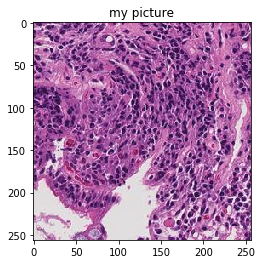

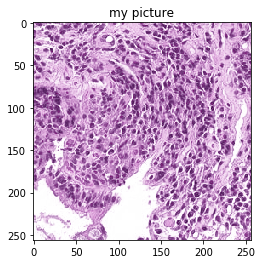

C08-41_01_7326_8325_0 Saved! Count: 10000  
 /scratch/as3ek/data_segments/data_balanced_duplicate_sample/train/Celiac/C08-41_01_7326_8325_0.jpg
10001 C15-75_01_2997_3663_0
10002 C07-34_03_1665_2331_1
10003 C12-64_02_2664_2331_0
10004 C10-47_02_12000_4000_1
10005 C12-60_01_13500_2500_0
10006 C17-80_02_9657_2331_1
10007 C15-75_04_2000_5000_0
10008 C10-48_01_4000_6500_1
10009 C14-70_04_6327_4329_1
10010 C07-37_06_6000_2500_1
10011 C06-30_02_3663_2331_1
10012 C10-47_02_13320_1998_0
10013 C10-51_03_12654_6660_0
10014 C12-60_03_11000_11000_1
10015 C07-37_01_2664_7659_1
10016 C11-56_03_666_5328_1
10017 C06-30_04_3330_1998_0
10018 C07-40_01_7659_2664_0
10019 C15-74_05_2664_2664_1
10020 C12-60_04_5000_6500_0
10021 C13-66_02_1500_7500_0
10022 C10-47_02_1332_4995_0
10023 C04-23_04_6500_2000_1
10024 C06-32_03_8991_2664_0
10025 C12-64_01b_1332_4995_0
10026 C07-35_04_7326_1998_1
10027 C12-60_04_3663_0_0
10028 C12-62_00_6993_13320_0
10029 C12-60_03_1998_2331_1
10030 C10-51_03_9000_5000_0
10031 C06-30

10288 C10-47_01_1332_8325_0
10289 C03-09_02_4500_2000_0
10290 C06-33_01_2331_1998_0
10291 C04-21_03_1998_1998_1
10292 C03-10_01_8000_1000_1
10293 C03-08_01_9657_0_0
10294 C03-05_04_5994_8991_0
10295 C03-10_05_3996_1665_1
10296 C04-18_01_2664_5994_0
10297 C11-57_02_3663_3996_1
10298 C15-75_03_2664_8325_0
10299 C09-46_01_8500_8500_0
10300 C11-54_04_2331_4329_1
10301 C11-56_02_7000_4500_0
10302 C05-26_02_5994_5994_1
10303 C03-12_03_666_4995_1
10304 C08-41_02_2997_5328_1
10305 C10-49_03_500_1500_0
10306 C12-58_01_4662_6327_0
10307 C15-73_02_1665_4329_0
10308 C12-60_03_8325_5661_0
10309 C04-15_02_5994_3330_0
10310 C15-75_01_5661_2997_0
10311 C15-75_03_10000_11000_0
10312 C17-80_01_12987_8658_0
10313 C12-60_03_1332_4995_0
10314 C14-71_05_5000_5000_0
10315 C12-61_02_6993_2331_1
10316 C12-64_01b_1500_7000_1
10317 C06-31_02_7500_1000_1
10318 C10-51_03_11500_6000_0
10319 C12-64_02_2000_1500_1
10320 C10-52_02_4662_3663_1
10321 C13-66_03_1000_5500_0
10322 C04-15_02_1332_2997_1
10323 C17-81_04_1998

10580 C10-47_01_3500_7500_0
10581 C12-60_01_4662_8658_0
10582 C12-62_00_4000_500_1
10583 C03-13_02_999_999_0
10584 C11-54_05_3996_4329_1
10585 C13-65_01_8325_2331_1
10586 C12-64_01b_9500_3000_0
10587 C12-58_02_1500_3500_1
10588 C06-30_01_2331_0_1
10589 C17-80_01_8991_10989_1
10590 C07-37_05_1332_4662_1
10591 C17-81_04_18648_333_0
10592 C10-47_02_11000_9000_1
10593 C12-62_00_9000_5000_0
10594 C11-56_01_10323_4662_1
10595 C13-65_01_3500_3000_1
10596 C10-47_02_11500_3500_1
10597 C04-18_03_5000_7000_0
10598 C14-70_01_1500_2500_0
10599 C12-62_00_8000_15500_0
10600 C17-83_02_4995_2997_0
10601 C03-06_02_2997_3996_1
10602 C12-64_01b_3500_2500_0
10603 C17-80_01_5661_16317_0
10604 C07-37_06_4329_1665_0
10605 C06-28_01_1500_3000_0
10606 C16-77_01_2500_9500_1
10607 C06-31_02_1998_666_1
10608 C03-13_01_7000_1000_1
10609 C13-66_01_1500_3500_0
10610 C11-57_02_5994_1665_0
10611 C15-73_02_4329_1998_0
10612 C03-08_01_3663_1665_0
10613 C11-55_02_8500_1500_1
10614 C10-47_02_6993_3330_1
10615 C04-18_02_276

In [ ]:
count = 0
for key in images_by_folder.keys():
    images = list(images_by_folder[key])
    images.reverse()
    for value in images:
        count += 1
        if count < 0:
            continue
#         print(key)
#         print(value)
        print (str(count) + ' ' + str(value))
        source_img_path = str(key) + str(value) + '.jpg'
        dest_img_path = str(path_change_map[key]) + str(value) + '.jpg'
#         print(source_img_path)
        img = staintools.read_image(source_img_path)
        if (np.mean(img) > 240) or (np.mean(img) < 10):
            continue
        # standardize brightness
        img_standard = standardizer.transform(img)
        # transform the images
        img_normalized = stain_normalizer.transform(img_standard)
        # write image to path

#             plt.imshow(img)
#             plt.title('my picture')
#             plt.show()
#             plt.imshow(img_normalized)
#             plt.title('my picture')
#             plt.show()

        if (count % 10000 == 0):
            plt.imshow(img)
            plt.title('my picture')
            plt.show()
            plt.imshow(img_normalized)
            plt.title('my picture')
            plt.show()
            print(value + ' Saved! Count: ' + str(count) + '  \n ' + str(dest_img_path))
        cv2.imwrite(os.path.normpath(dest_img_path), img_normalized)

In [ ]:
path_change_map